# SIXT33N Project
## Phase 1: PCA - Genre Sorting

### EE 16B: Designing Information Devices and Systems II, Spring 2016

Written by Nathaniel Mailoa and Emily Naviasky (2016)

nmailoa@berkeley.edu &emsp; enaviasky@berkeley.edu

**Name 1**:

**Login**: ee16b-


**Name 2**:

**Login**: ee16b-

## Table of Contents

* [Introduction](#intro)
* [Part 1: Data Collection](#part1)
* [Part 2: Principal Component Analysis](#part2)
* [Part 3: Classification](#part3)
* [Part 4: Launchpad Implementation](#part4)

<a id='intro'></a>
## Introduction

In this version of the project, SIXT33N is a very picky robot when it comes to music. There is one genre of music that SIXT33N loves and will chase, but there is another genre that SIXT33N runs away from. Which genres are those? That is what you are going to discover in this phase.

For phase 1, you will develop the PCA classifier that allows SIXT33N to tell the difference between the two genres. You will examine several different musical genres, and determine which ones will be easiest to sort by PCA. However, your teammates are just starting to build the microphone circuit that will serve as SIXT33N's ears, so you will acquire sample data using the class microphone board. (You just need enough data to experiment with, you will collect your final set of training data in the next phase.)

Once you have some sample data collected, you will develop a model in this iPython Notebook (since iPython has pretty graphs and lots of computing power, and a Launchpad does not). You will look at that sample data to get an idea of what features might be easily distingused, and which of the several genres you have collected will be the easiest to separate. Then, you can experiment with different methods of signal processing to accentuate those differences. By the end you will hace developed a classifier algorithm. 

Once you (and your GSI) are satisfied with the classifier's accuracy, you will port the classifier into the Launchpad code in Energia. However, since your Launchpad has so much less computing power than your PC, you will examine ways to optimize the classification before you port it.  

As a reminder, you will have 2 weeks to work on this phase and choose the genres and the analysis methods that work well for you before you collect your final set of training data on the microphone circuit that your teammates are building.

The goals of this phase are as follows:
- Experiment with different genres
- PCA + Classifier (2 genres)
- Check accuracy
- PCA projection on Launchpad

As mentioned in the main project page, there is a checkpoint every week. Each checkpoint is worth 5 points, and if you are late you are awarded 4 points. The checkpoints are due in the beginning of the lab in the week after. For this phase, the checkpoints (marked **<span style="color:green">green</span>** in the Notebook) are:
- Week 1: First pass through PCA with sample data; GSI feedback
- Week 2: Classification target met in Python

<a id='part1'></a>
## <span style="color:blue">Part 1: Data Collection</span>

### Materials
- Microphone front-end circuit
- Launchpad + USB

SIXT33N, being a robot, does not listen to music quite the same way that we do. While we listen to music temporally, SIXT33N much prefers to take the DFT of samples of the music and judge them based on their frequency content.

Keeping in mind that you are distinguishing music in the frequency domain, brainstorm with your partner. What genres do you think will look the most different? Pick four or more music genres that you think will classify well.

**<span style="color:red">What genres are you going to try? Why?</span>** 

Firstly, upload the sketch <b>`collect-data-music.ino`</b> to your Launchpad. This sketch gathers ADC samples every 0.35ms, performs a 128-point FFT, and streams the real and imaginary parts of the coefficient back to the PC. This code also sets some pins to input pins, which is required for the microphone board to work.

Attach the class microphone board to your Launchpad, as shown below. Make sure that you are connecting row 1 on the mic board to 3.3V/5V on the Launchpad. Next, you will want to remove the jumper on your Launchpad labeled 5V. You are doing this so that you can power the mic-board's 5V power off of your bench power supply. The power supply is a quieter power source than USB. <b>Put the jumper so that it is connected only to the pin closest to the usb, so that you do not lose it. We do not have replacements for them.</b> Make sure that your power supply is delivering a 100mA current limited 5V. You can connect 5V to either the pin of the jumper that you just removed closest to the green board, or to the bottom pin labeled 5V and ground to the ground pin in the opposite bottom corner. Make sure everything is hooked up as below.

<center>
<img width="600px" src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/proj-micboard.png">
</center>

Probe the test point of the board using your oscilloscope. You should see a changing signal centered around 1.5V. If the signal is centered too far from 1.5V, take a screw driver and turn the potentiometer on the microphone board until the signal is in the right place again. Make a noise at the microphone; you should see the signal change to reflect the sound you just made. If you are close enough or loud enough, you should be able to get the peak-to-peak amplitude of your signal all the way up to 3V.

<center>
<img width="400px" src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/proj-waveform.png">
</center>

Now, go track down one of the genres you decided on using. Play the music to the microphone, and see how it looks on the scope. Move the speaker towards and away from the microphone. Notice how the signal gets distorted when the sound is too loud? Good audio data is loud enough that noises from the rest of the room don't show up too much, but quiet enough that the signal doesn't get distorted when it saturates the output. Position your speakers so that the music you want to collect is loud but not distorted.

The next step is to sample that signal and save it to a file on your computer so you can start experimenting with it. You should already have <b>`collect-data-music.ino`</b> uploaded. As a reminder, this sketch gathers ADC samples every 0.35ms, performs a 128-point FFT, and streams the real and imaginary parts of the coefficient back to the PC. With the music you selected playing, open a terminal and run the script:

<b>`python collect-data.py log.csv`</b>

<b>After the code is uploaded and the script is run, hit the reset button.</b> The Launchpad is sending the real and imaginary parts of the FFT coefficients to the computer and this script is collectin them and storing them in `log.csv`. After about thirty seconds of data collection, stop the script by hitting `Ctrl-C`. Check the `log.csv` and make sure that it looks like an FFT and is not just full of zeros. It might help to plot the data to make sure.

This little snippet that you collected is too short to do anything useful with, but you now know the process for collecting data. You can now begin collecting your sample data. 

Keep in mind that for each genre, you want around two or three minutes worth of sample data. You will collect more once you settle on the two genres that you want to use and once your partners are finished building the mic circuit that you will use. It is important that your final data is collected on your final mic circuit or else PCA will not work as well. 

For each genre, once the data is collected, rename `log.csv` to something descriptive of the genre you just played. Again, do this for each genre or else the script will over write the data you just collected.  

####For your Consideration:

Once you have your four or more genres collected, you can move onto the PCA classification and data analysis below. You may realize in the next section that none of your inital choices of genre are sorting quite as well as you would like. Don't be afraid to come back to this section and try collecting data from different genres using what you have learned about what makes a genre sortable. However, keep in mind that signal processing will play a big part in making a genre easy to sort.

That is part of the design aspect of this phase, deciding when your raw data is not good enough and when your data processing is not good enough. Feel free to discuss your design choices with your TA at any time!

<a id='part2'></a>
## <span style="color:blue">Part 2: Principal Component Analysis</span>

In the previous part you decided on genres to test and collected all the data that you will need to start experimenting. Now the fun can really start! 

The python function `read_csv()` is provided below to extract the data from the the .csv files you just collected. Call `read_csv()` on each genre file, and name each result a different variable.

In [461]:
import numpy as np
import numpy.matlib
import scipy.io
import matplotlib.pyplot as plt
import csv
import math
from scipy.cluster.vq import whiten, kmeans
%matplotlib inline

In [462]:
def read_csv(filename):
    """
    Reads a csv file and returns the first 20 recordings from the file
    Input:
        filename: csv filename
    Output:
        data: a 20x66 matrix corresponding to the first 20 readings in the csv file. Each row corresponds
            to a reading; the first 33 values are x-coordinates while the second33 values are y-coordinates
    """
    data = []
    with open(filename, 'r') as csvfile:
        r = csv.reader(csvfile, delimiter=' ')
        for row in r:
            data.append([float(i) for i in row[0].split(',')])
    return np.array(data)

In [463]:
"""
Outputs array of magnitudes of imaginary numbers for one dimensional NumPy array
Input:
    signal: One dimensional NumPy array with real and imaginary coefficients interleaved
            [re0, im0, re1, im1, ...] of length L
Output
    One dimensional NumPy array of length L / 2, where each element is the magnitude of 
    of the nth complex number [mag0, mag1, ...]
"""
def compute_magnitudes(signal):
    reals = signal[0::2]
    imags = signal[1::2]
    return [ math.sqrt(x) for x in (reals * reals + imags * imags)]
    #return [ x for x in (reals * reals + imags * imags)]

In [464]:
# Read the csv files using read_csv
# YOUR CODE HERE
dp_hw_alive = read_csv('DAFT_PUNK/DP_HW_alive.csv')
dp_hw_da_funk = read_csv('DAFT_PUNK/DP_HW_da_funk.csv')
dp_hw_rolling = read_csv('DAFT_PUNK/DP_HW_rolling.csv')
dp_ram_get_lucky = read_csv('DAFT_PUNK/DP_RAM_get_lucky.csv')
dp_ram_instant_crush = read_csv('DAFT_PUNK/DP_RAM_instant_crush.csv')
dp_ram_fragments_of_time = read_csv('DAFT_PUNK/DP_RAM_fragments_of_time.csv')

clips = [
    ['Homework - Alive', dp_hw_alive],
    ['Homework - Da Funk', dp_hw_da_funk],
    ['Homework - Rolling', dp_hw_rolling],
    ['RAM - Get Lucky', dp_ram_get_lucky],
    ['RAM - Instant Crush', dp_ram_instant_crush],
    ['RAM - Fragments of Time', dp_ram_fragments_of_time]
]
"""
hw = np.vstack([
        #dp_hw_alive,
        #dp_hw_da_funk,
        dp_hw_rolling
    ])

ram = np.vstack([
        dp_ram_get_lucky,
        #dp_ram_instant_crush,
        #dp_ram_fragments_of_time
    ])
"""
#mm starts from beginning to about 1 min
#e piu ti penso starts at 0:55 ends at 1:30
ram = read_csv('mm2.csv')
hw = read_csv('ag3.csv')


print('hw.shape =', hw.shape)
print('ram.shape =', ram.shape)

num_samples = min([hw.shape[0], ram.shape[0]])
print('num_samples =', num_samples)

# Take the same number of readings for both genres to be fair
hw = hw[:num_samples, :]
ram = ram[:num_samples, :]

print('hw.shape =', hw.shape)
print('ram.shape =', ram.shape)

hw.shape = (100, 256)
ram.shape = (273, 256)
num_samples = 100
hw.shape = (100, 256)
ram.shape = (100, 256)


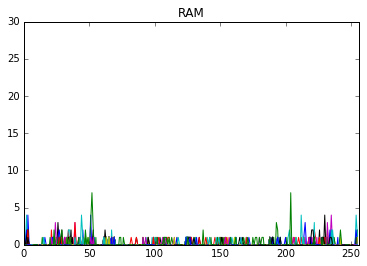

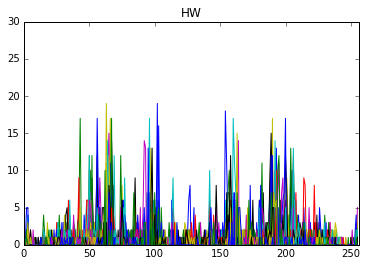

In [465]:
# Plot the readings

x0, x1 = 0, 256
y0, y1 = 0, 30

#for clip in clips:
#    plt.xlim(x0, x1)
#    plt.ylim(y0, y1)
#    plt.title(clip[0])
#    plt.plot(clip[1].T)
#    plt.figure()

plt.xlim(x0, x1)
plt.ylim(y0, y1)
plt.title("RAM")
plt.plot(ram.T)
plt.figure()

plt.xlim(x0, x1)
plt.ylim(y0, y1)
plt.title("HW")
plt.plot(hw.T)
plt.figure()

plt.show()

In [466]:
hw_mag = np.zeros((num_samples, 128))
for i in range(num_samples):
    hw_mag[i, :] = compute_magnitudes(hw[i, :])

ram_mag = np.zeros((num_samples, 128))
for i in range(num_samples):
    ram_mag[i, :] = compute_magnitudes(ram[i, :])
    
print('hw_mag.shape =', hw_mag.shape)
print('ram_mag.shape =', ram_mag.shape)

hw_mag.shape = (100, 128)
ram_mag.shape = (100, 128)


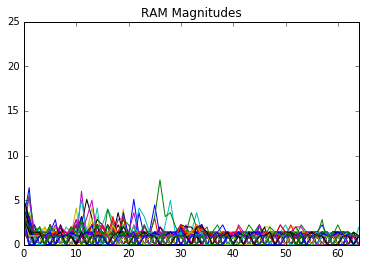

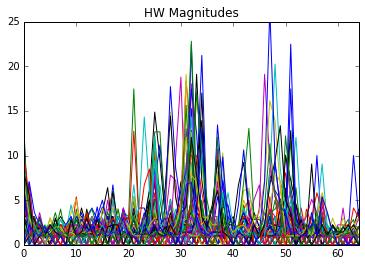

In [467]:
x0, x1 = 0, 64
y0, y1 = 0, 50

plt.xlim(x0, x1)
plt.ylim(y0, y1 / 2)
plt.title("RAM Magnitudes")
plt.plot(ram_mag.T)
plt.figure()

plt.xlim(x0, x1)
plt.ylim(y0, y1 / 2)
plt.title("HW Magnitudes")
plt.plot(hw_mag.T)
plt.figure()

plt.show()

The plots that you just generated show the frequency spectrum of each of the samples you just collected. Each plot is a different genre and each line is a sample within that genre. 

<b>Note, that the spectrum looks mirrored across the center. This is due to sampling and aliasing that you will learn about soon. For now, what you need to know is that highest frequency content is in the middle and the second half of the data is redundant.</b>

<center>
<img width="400px" src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/proj-aliased-spectrum.png">
</center>

Start by looking at just one genre. Note that even samples from the same genre might look somewhat different. Because SIXT33N samples only a short section of music and then looks at the DFT, the music might look very different between samples. A sample might be taken at a loud instrumental part of the music or a quiet part when not much is happening. The important part to look at is what most of the samples seem to be doing at a particular frequency.

Now, compare the plots across genres. They should be pretty different. Does the genre have a lot of high frequency content? Which two genres do you think PCA will be able to tell apart the best? If you are having trouble telling apart the genres, PCA will probably have trouble doing so as well.

Pick two genres that you think PCA will classify the best, those are the genres that you will use for the rest of the code in this part. However, if your results are not what you would like, feel free to try another pairing.

You will now write the function <b>`process_data`</b> below that processes the raw data and puts it into a matrix that the Principal Component Analysis can use. Processing data is about taking raw, noisy data and removing noise and accentuating important information so that classification algorithms like PCA are working with the most information that we can give them. Experiment with a couple methods of signal processing.

- Try removing redundant information.
- Filtering is a good way of removing noise. Try experimenting with using different ranges of your spectrum. 
- You have data for both real and imaginary parts of your FFT, does one work better than the other? You might also want to think about ways to combine the real and imaginary parts of each coefficient and somehow normalize each row.

Keep in mind that the same data pre-processing algorithm has to run on the Launchpad, so try to keep it as simple as possible.

In [468]:
def process_data(data, debug=False):
    """
    Construct the A matrix so that it is friendly for PCA. This may include some data manipulation.
    Input:
        data: a Nx256 matrix containing 1 FFT data reading in each row. The real and imaginary
            parts of each coefficient are interleaved, so the first row contains
            [re0 im0 re1 im1 ... re127 im127] if reN is the real part of the Nth coefficient
            and imN is the imaginary part of the Nth coefficient
    Output:
        A: the A matrix for PCA
    """
    A = data
    
    if debug:
        plt.title('Data')
        plt.plot(A.T)
        plt.figure()
        print('A.shape =', A.shape)
    
    # compute magnitudes
    A = np.apply_along_axis(compute_magnitudes, 1, A)
    
    if debug:
        plt.title('Magnitudes')
        plt.plot(A.T)
        plt.figure()
        print('A.shape =', A.shape)
    
    # remove redundant half
    A = A[:, 0:64]
    #A = np.hstack((A[:, 1:6], A[:, 32:48]))
    
    # use frequencies 0 - 6 + 32 - 48
    #A = np.hstack((A[:, 9:14], A[:, 30:38]))
    #A = A[:,5:20]
    #if debug:
    #    plt.title('Frequency range')
    #    plt.plot(A.T)
    #    plt.figure()
    #    print('A.shape =', A.shape)
    
    ## clip magnitudes > 50
    #A = np.apply_along_axis(lambda x: np.clip(x, -10, 50), 1, A)
    #
    #if debug:
    #    plt.title('Clip')
    #    plt.plot(A.T)
    #    plt.figure()
    #    print('A.shape =', A.shape)
        
    ## set magnitudes < 4 to 0
    #for i in range(A.shape[0]):
    #    for j in range(A.shape[1]):
    #        if A[i, j] < 4.0:
    #            A[i, j] = 0.0
    #
    #if debug:
    #    plt.title('de-noise')
    #    plt.plot(A.T)
    #    plt.figure()
    #    print('A.shape =', A.shape)
    
    # de-mean
    #A_avgs = np.mean(A, axis=0)
    #A = A - A_avgs[np.newaxis, :]
    
    if debug:
        plt.title('De-mean')
        plt.plot(A.T)
        plt.figure()
        print('A.shape =', A.shape)
        #print('A_avgs.shape =', A_avgs.shape)
        print('A_avgs[0:4] =')
        #print(A_avgs)
        print(np.mean(A[:, 0]))
    
    ## whiten
    # A = A / np.std(A, axis=0)
    #
    #if debug:
    #    plt.title('Whiten')
    #    plt.plot(A.T)
    #    plt.figure()
    #    print('A.shape =', A.shape)
    
    plt.show()
    
    return A

A.shape = (100, 256)
A.shape = (100, 128)
A.shape = (100, 64)
A_avgs[0:4] =
4.23


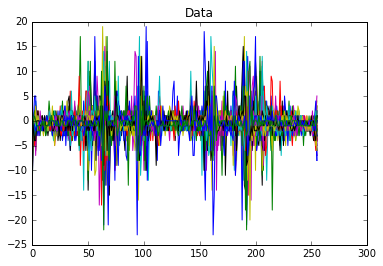

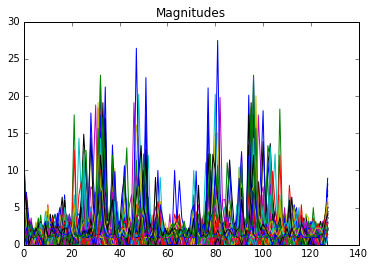

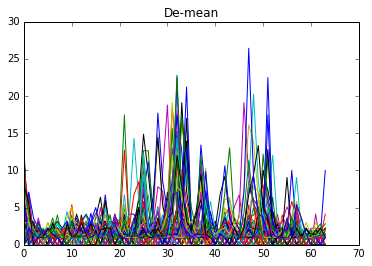

A.shape = (100, 256)
A.shape = (100, 128)
A.shape = (100, 64)
A_avgs[0:4] =
3.12


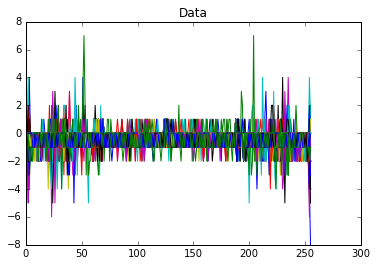

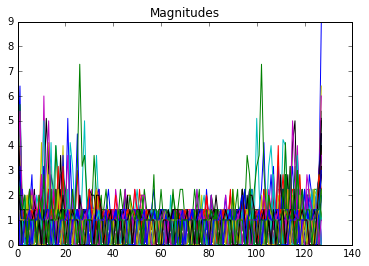

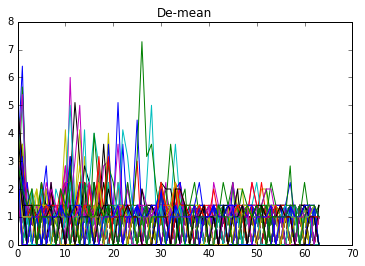

In [469]:
# Build A matrix for PCA
hw_processed = process_data(hw, True)
ram_processed = process_data(ram, True)

A = np.vstack((hw_processed, ram_processed))


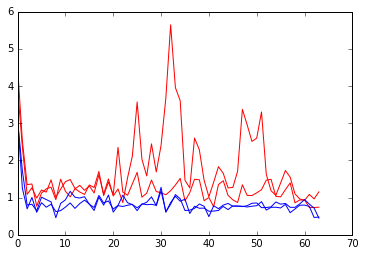

In [470]:
# Examine the results of process_data() on the average across each genre
for i in range(num_samples//50):
    plt.plot(np.mean(A[i*50:(i+1)*50], 0), 'red')
for i in range(num_samples//50):
    plt.plot(np.mean(A[num_samples + i*50 : num_samples + (i+1)*50], 0), 'blue')

Try running the following SVD code on your matrix A, and get a base line of how well it works.

Once you get an idea of what it looks like on its own, you might want to experiment with using other types of pre-processing on your matrix A. For example, zero-meaning might have interesting results. Let processed_A be A with some signal processing applied to it.


**<span style="color:red">What processing techniques did you try on the matrix and and what was the result?</span>** 


Finally we are ready to take the SVD in order to retrieve the principal components. 

In [471]:
# Take the SVD of processed_A
A_avgs = np.mean(A, axis=0)
processed_A = A - A_avgs[np.newaxis, :]
print('processed_A.shape =', processed_A.shape)
[U,s,V] = np.linalg.svd(processed_A, full_matrices=True)
print('U.shape =', U.shape)
print('s.shape =', s.shape)
print('V.shape =', V.shape)

processed_A.shape = (200, 64)
U.shape = (200, 200)
s.shape = (64,)
V.shape = (64, 64)


Now that we have taken the SVD, let's examine the results. Plot the sigma values. How many principle components do the sigma values suggest you will need? If the results of the SVD are not satisfactory, think of other ways you can change `processed_A` to get a better result. 

Once you feel that your sigma values are satisfactory, you will know how many principal components you need. (Note, if this number is not small, you might need to go back and try to get better results.)


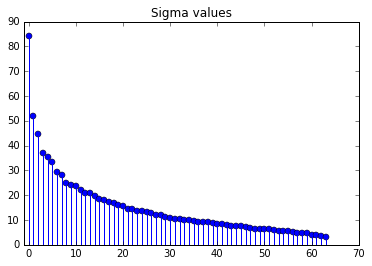

In [472]:
# Plot the sigma values
plt.stem(s)
plt.xlim(-1)
plt.title('Sigma values')

Take a look at the principle components you have chosen to use. What do they tell you about the important features for distinguishing between genres?

Then, project the data on the principal component(s) you found above and plot the projection. How well does the new basis separate the genres?

(64, 2)


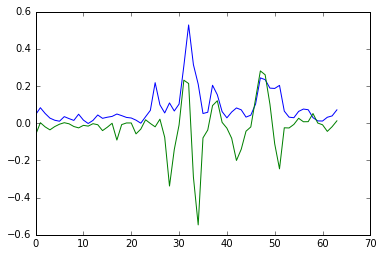

In [473]:
# Plot the significant principal component
# YOUR CODE HERE
i = 0
V = V.T
pc = V[:,i:i+2]
plt.plot(pc)
print(pc.shape)

proj.shape = (200, 2)


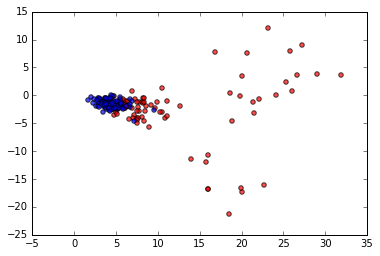

In [476]:
# Project the data matrix to the first principal component
#proj = (pc.T.dot(processed_A.T)).T
proj = A.dot(pc)

print('proj.shape =', proj.shape)

# Plot the projection
x = np.linspace(0,num_samples / 2, num_samples)

# print('x.shape =', x.shape)

plt.scatter(proj[:num_samples, 0], proj[:num_samples, 1], c=['red'], alpha=0.7)
plt.scatter(proj[num_samples:, 0], proj[num_samples:, 1], c=['blue'], alpha=0.7)

#plt.xlim(-15, 15)
#plt.ylim(-10, 10)

#plt.scatter(x,proj[:num_samples], c=['red'], edgecolors='none', alpha=0.7)
#plt.scatter(x + num_samples, proj[num_samples:], c=['blue'], edgecolors='none', alpha=0.7)
#plt.legend(['genre1', 'genre2'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The above code plots each sample, projected into the new basis. The x axis is the sample number. So the left half of the x axis is all the samples from the first genre in order, and the right half is all the samples from the other genre. If you used one principal component, then the y axis will be where PCA has clustered the sample. You should be able to draw a horizontal line in your head such that most of the points on the right are on one side of the line and most of the points on the left are on the other side of the line.

You can also try plotting a histogram of the projection results to see how each genre behaves with the PCA vectors. This is another way of looking at the same results by seeing how many points are classified where. You would like to see a red peak, and a blue peak, with little overlap.

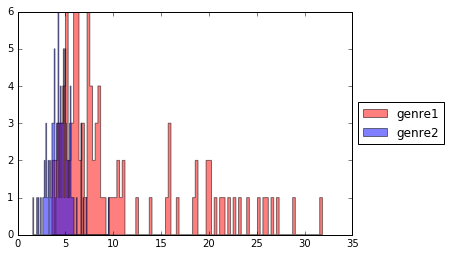

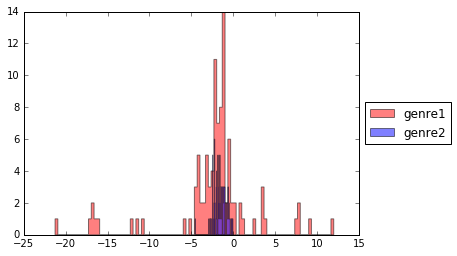

In [477]:
#plt.xlim(-50, 50)
plt.hist(proj[:num_samples, 0], 100, color=['red'], alpha=0.5, histtype='stepfilled')
plt.hist(proj[num_samples:, 0], 100, color=['blue'], alpha=0.5, histtype='stepfilled')
plt.legend(['genre1', 'genre2'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure()

#plt.xlim(-50, 50)
plt.hist(proj[:num_samples, 1], 100, color=['red'], alpha=0.5, histtype='stepfilled')
plt.hist(proj[num_samples:, 1], 100, color=['blue'], alpha=0.5, histtype='stepfilled')
plt.legend(['genre1', 'genre2'],loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

<img width='30px' align='left' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/check.png">
<br/>
## <span style="color:green">CHECKPOINT 1</span>
 <span style="color:green">**First pass through PCA with sample data.** Show your GSI the result of the projection and talk about how you might be able to improve the result.</span>

Your data might look noisy, and might not classify perfectly. That is completely okay, we are just looking for good enough. Like many AI applications, this is very noisy data that we are classifying so some error in classification is okay. The important part is if you think that you can see some clustering. 

Once you think you have decent clustering, you can move on to getting your code to automate classification and you will make up for some of the error there, too. However, if you don't see clustering, go back and and see what you can do to improve it. If you cannot separate your data with some decent accuracy, your code probably cannot either.


<a id='part3'></a>
## <span style="color:blue">Part 3: Classification</span>

Using what you learned about your data in the last section, you will define a way of separating the genres. In the same way that you separated the data by eye, you will now write code to automate the process. Fill in the skeleton code that we have provided below. The function classify should take a data vector and a PC vector as input, <b>do all of the signal processing you decided on in the previous part</b>, then project the data into the new basis, and reference some threshold to decide which genre the data vector should be classified as.

Basically, you are taking all of the processing code from the previous part and putting it into a single function so that you can see how it performs.

In [478]:
# eye-balling initial clusters
#hw_init_cluster = [-1, 1]
#ram_init_cluster = [1, -0.5]
hw_init_cluster = [-10, 0]
ram_init_cluster = [0, 0]
initial_clusters = np.array([hw_init_cluster,
                             ram_init_cluster])

# k-means
clusters, distortion = kmeans(proj, 2)

hw_cluster = clusters[0]
ram_cluster = clusters[1]

print('clusters =', clusters)
print('distortion =', distortion)

clusters = [[ 21.38863375  -3.19373356]
 [  5.46905191  -1.75330473]]
distortion = 2.83021885018


In [500]:
def classify(vector, new_basis):
    """
    Classifies a new reading vector into one of the 2 genres.
    Inputs:
        vector: 1xM reading vector - pre-processed data vector 
            (i.e. a line of A - NOT processed_A)
        new_basis: matrix with the basis of the new space
    Output:
        String of the classified genre
    """
    
    #if np.argmax(vector) > 20:
    #    return 'ram'
    #else:
    #    return 'hw'
    
    proj = (new_basis.T.dot(vector.T)).T
    
    
    if 5.6 > proj[0]:
        return 'ram'
    else:
        return 'hw'
    
    c1_d = np.linalg.norm(hw_cluster - proj)
    c2_d = np.linalg.norm(ram_cluster - proj)
    
    if (c1_d < c2_d):
        return 'hw'
    else:
        return 'ram'
    
    # lol super hacky
    #if proj[0] < -1 or proj[0] > 1:
    #    return 'hw'
    #else:
    #    return 'ram'

In [501]:
# Try out the classification function
print(classify(A[2,:], pc)) # Modify to use other vectors
print(pc)

hw
[[  4.54235320e-02  -6.31441249e-02]
 [  8.33433466e-02   2.73746099e-03]
 [  5.23490740e-02  -1.97678546e-02]
 [  2.73970099e-02  -3.58345572e-02]
 [  1.59031576e-02  -1.83043612e-02]
 [  1.06421781e-02  -5.43932104e-03]
 [  3.53039245e-02   2.66823365e-03]
 [  2.46552559e-02  -3.21639956e-03]
 [  1.49484981e-02  -1.77555432e-02]
 [  4.83212670e-02  -2.51682008e-02]
 [  1.66723053e-02  -1.16088475e-02]
 [ -1.62551148e-03  -1.56398765e-02]
 [  1.49360673e-02  -2.70478547e-03]
 [  4.41784735e-02  -8.18322400e-03]
 [  2.62002828e-02  -3.99045661e-02]
 [  3.21929784e-02  -2.16050044e-02]
 [  3.65313741e-02  -3.79242175e-04]
 [  4.93877233e-02  -9.07825415e-02]
 [  4.06881691e-02  -7.57189021e-03]
 [  3.10848082e-02   1.28051413e-03]
 [  2.79219519e-02   1.29185423e-03]
 [  1.63531390e-02  -5.73641830e-02]
 [  2.41786516e-05  -3.18562176e-02]
 [  3.47701259e-02   1.84096032e-02]
 [  6.91084517e-02  -1.52917492e-03]
 [  2.17912660e-01  -1.94902098e-02]
 [  9.86368776e-02   2.15932776e-02

Next, you will check the accuracy of your classification. <b>Our target is for the classifier to classify at least 80% correctly on both genres.</b> Write code to apply the `classify` function to each row in `A` and check whether the classification is accurate. Compute the accuracy of classifying your first genre correctly and the accuracy of classifying the second genre correctly. These values should be about equal, and large differences in them might help you identify what needs to change in your <b>`classify`</b> function. Don't worry if the accuracy is not high enough - we will fix that soon.

In [502]:
# Try to classify the whole A matrix
genre1_good = 0;
genre1_bad = 0;
genre2_good = 0;
genre2_bad = 0;

for i in range(num_samples):
    if classify(A[i, :], pc) == 'hw':
        genre1_good += 1
    else:
        genre1_bad += 1
for i in range(num_samples):
    if classify(A[num_samples + i, :], pc) == 'ram':
        genre2_good += 1
    else:
        genre2_bad += 1

print('genre1_good =', genre1_good)
print('genre1_bad =', genre1_bad)
print('genre2_good =', genre2_good)
print('genre2_bad =', genre2_bad)
    
print("Percent Correct of Genre 1 = ", genre1_good / (genre1_good + genre1_bad))
print("Percent Correct of Genre 2 = ", genre2_good / (genre2_good + genre2_bad))

genre1_good = 78
genre1_bad = 22
genre2_good = 89
genre2_bad = 11
Percent Correct of Genre 1 =  0.78
Percent Correct of Genre 2 =  0.89


Are the accuracy numbers high enough? Did you hit at least 80%? If the accuracy still is not as high, think of other ways to make the classifier better. 

Remember that SIXT33N has as long as it likes to make a decision before moving. Consider collecting multiple samples of music before deciding which genre the music belongs to, using some sort of majority function to choose the final answer.

<img width='30px' align='left' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/check.png">
<br/>
## <span style="color:green">CHECKPOINT 2</span>
 <span style="color:green">**Show your GSI the classification that has at least 80% accuracy on both genres.**</span>

<a id='part4'></a>
## <span style="color:blue">Head Start: Launchpad Implementation</span>

### Materials
- Microphone front-end circuit
- Launchpad + USB

In the next phase you will collect your true data set on your teammate's microphone circuit, and then implement your <b>data processing</b> and <b>classification</b> on the Launchpad.

If you finish this phase within the first two weeks, then we strongly recommmend you get ahead by working on "Part 3:Launchpad Implementation" in `SIXT33N-processing-music.ipynb` to get a jump start on the processing integration phase. That section will walk you through taking the signal procesing that you just developed above and translating it from python to C that will go on your launchpad.

In addition, you will need to transfer the PCA vector and mean you found here into the launchpad. To do so, simply run the block below and copy each output into the Launchpad code.

You may also use this code for any other vectors that you need in your code.

In [435]:
print(', '.join(map(str, pc[:, 0])))

len(pc[:, 1])

0.0454235320115, 0.0833433465979, 0.0523490740498, 0.0273970098584, 0.0159031576311, 0.0106421780887, 0.0353039245288, 0.0246552559277, 0.0149484980867, 0.0483212670142, 0.0166723052959, -0.00162551148454, 0.0149360673377, 0.0441784735446, 0.0262002828474, 0.0321929783614, 0.0365313740695, 0.0493877233093, 0.0406881691054, 0.0310848082124, 0.0279219518908, 0.0163531390321, 2.41786515769e-05, 0.0347701258818, 0.0691084516984, 0.217912659838, 0.0986368775651, 0.0551738965652, 0.108904977726, 0.065612742116, 0.102675637947, 0.307756196984, 0.528286867173, 0.314953303036, 0.209971390881, 0.0520755124445, 0.0588622233274, 0.204084721866, 0.152789095613, 0.0624855705812, 0.0288489917552, 0.0600677855841, 0.0820259050437, 0.0718611438542, 0.0328147600461, 0.0430775936321, 0.10322660152, 0.243643627455, 0.234140069054, 0.188580368323, 0.186891408956, 0.203283763713, 0.0649805402809, 0.0324393316411, 0.0294183751705, 0.063394990453, 0.076044294734, 0.0724260052506, 0.0297776343848, 0.0123345866

64